In [177]:
#theEarliertheBetter
#SupportVectorMachine

#importing necessary packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.metrics import (confusion_matrix, classification_report, accuracy_score,precision_score, recall_score, f1_score,roc_curve, roc_auc_score)
from sklearn.preprocessing import StandardScaler
from scipy.stats import uniform
import warnings
warnings.filterwarnings('ignore')

In [178]:
#uploading the data

data = pd.read_csv("/Users/cmoradajr/Downloads/The_Cancer_data_1500_V2.csv")
data.head(5)

,Age,Gender,BMI,Smoking,GeneticRisk,PhysicalActivity,AlcoholIntake,CancerHistory,Diagnosis
0,58,1,16.085313,0,1,8.146251,4.148219,1,1
1,71,0,30.828784,0,1,9.361630,3.519683,0,0
2,48,1,38.785084,0,2,5.135179,4.728368,0,1
3,34,0,30.040296,0,0,9.502792,2.044636,0,0
4,62,1,35.479721,0,0,5.356890,3.309849,0,1


In [179]:
#Descriptive Statistics

print("Descriptive Statistics:")
data.describe()

Descriptive Statistics:


,Age,Gender,BMI,Smoking,GeneticRisk,PhysicalActivity,AlcoholIntake,CancerHistory,Diagnosis
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,50.320000,0.490667,27.513321,0.269333,0.508667,4.897929,2.417987,0.144000,0.371333
std,17.640968,0.500080,7.230012,0.443761,0.678895,2.866162,1.419318,0.351207,0.483322
min,20.000000,0.000000,15.000291,0.000000,0.000000,0.002410,0.001215,0.000000,0.000000
25%,35.000000,0.000000,21.483134,0.000000,0.000000,2.434609,1.210598,0.000000,0.000000
50%,51.000000,0.000000,27.598494,0.000000,0.000000,4.834316,2.382971,0.000000,0.000000
75%,66.000000,1.000000,33.850837,1.000000,1.000000,7.409896,3.585624,0.000000,1.000000
max,80.000000,1.000000,39.958688,1.000000,2.000000,9.994607,4.987115,1.000000,1.000000


In [180]:
#checking the data correlation

data_corr = data.corr()
data_corr

,Age,Gender,BMI,Smoking,GeneticRisk,PhysicalActivity,AlcoholIntake,CancerHistory,Diagnosis
Age,1.000000,0.007145,0.030246,-0.013914,-0.027025,0.016396,0.003209,-0.010996,0.196603
Gender,0.007145,1.000000,-0.012516,0.035384,-0.004674,0.023401,0.009723,0.007657,0.250336
BMI,0.030246,-0.012516,1.000000,-0.012616,0.011392,0.011480,0.004711,-0.010824,0.187560
Smoking,-0.013914,0.035384,-0.012616,1.000000,-0.021039,-0.043817,-0.001660,0.016368,0.226999
GeneticRisk,-0.027025,-0.004674,0.011392,-0.021039,1.000000,-0.039721,-0.016864,-0.010833,0.253472
PhysicalActivity,0.016396,0.023401,0.011480,-0.043817,-0.039721,1.000000,0.033856,0.018136,-0.150089
AlcoholIntake,0.003209,0.009723,0.004711,-0.001660,-0.016864,0.033856,1.000000,0.055403,0.212772
CancerHistory,-0.010996,0.007657,-0.010824,0.016368,-0.010833,0.018136,0.055403,1.000000,0.392188
Diagnosis,0.196603,0.250336,0.187560,0.226999,0.253472,-0.150089,0.212772,0.392188,1.000000


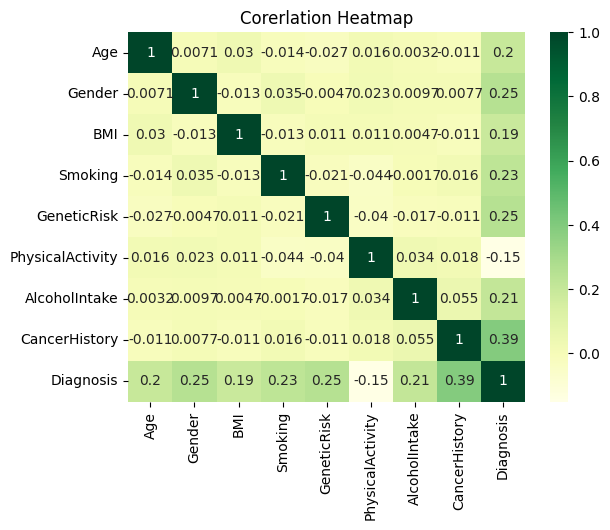

In [181]:
#visualizing the correlation

sns.heatmap(data_corr, annot = True, cmap = 'YlGn')
plt.title('Corerlation Heatmap')
plt.show()

In [182]:
#Assigning the variables

X = data.drop('Diagnosis', axis=1)
y = data['Diagnosis']

In [183]:
#splitting the dataset to training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state= 45, stratify = y)

print(f"\n✅ Training set: {X_train.shape}")
print(f"✅ Test set: {X_test.shape}")


✅ Training set: (1200, 8)
✅ Test set: (300, 8)


In [184]:
#feature scaling 

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [185]:
#Baseline Model

print("\n" + "="*70)
print("BASELINE MODEL")
print("="*70)

svm_baseline = SVC(kernel='linear', C=1.0, random_state=45, probability=True)
svm_baseline.fit(X_train_scaled, y_train)

y_pred_baseline = svm_baseline.predict(X_test_scaled)
y_proba_baseline = svm_baseline.predict_proba(X_test_scaled)[:, 1]

baseline_accuracy = accuracy_score(y_test, y_pred_baseline)
baseline_roc_auc = roc_auc_score(y_test, y_proba_baseline)

print(f"\n📊 Baseline Performance:")
print(f"   Accuracy: {baseline_accuracy:.4f}")
print(f"   ROC-AUC:  {baseline_roc_auc:.4f}")


BASELINE MODEL

📊 Baseline Performance:
   Accuracy: 0.8433
   ROC-AUC:  0.9256


In [186]:
#hyperparameter tuning

print("\n" + "="*70)
print("HYPERPARAMETER TUNING")
print("="*70)

param_dist = {
    'C': uniform(0.1, 100),
    'gamma': ['scale', 'auto'] + list(uniform(0.001, 1).rvs(10)),
    'kernel': ['linear', 'rbf'],
    'class_weight': [None, 'balanced']
}

print("\n🔍 Parameter Space:")
print("   • C: 0.1 to 100 (regularization)")
print("   • gamma: 'scale', 'auto', + random values")
print("   • kernel: ['linear', 'rbf']")
print("   • class_weight: [None, 'balanced']")


HYPERPARAMETER TUNING

🔍 Parameter Space:
   • C: 0.1 to 100 (regularization)
   • gamma: 'scale', 'auto', + random values
   • kernel: ['linear', 'rbf']
   • class_weight: [None, 'balanced']


In [187]:
#RandomizedSearchCV

print("\n🔄 Running RandomizedSearchCV...")
rand_search = RandomizedSearchCV(
    SVC(random_state=45, probability=True),
    param_distributions=param_dist,
    n_iter=50,
    cv=5,
    scoring='roc_auc',
    verbose=1,
    random_state=45,
    n_jobs=-1
)

rand_search.fit(X_train_scaled, y_train)


🔄 Running RandomizedSearchCV...
Fitting 5 folds for each of 50 candidates, totalling 250 fits


,estimator,SVC(probabili...ndom_state=45)
,param_distributions,"{'C': <scipy.stats....t 0x13abd8590>, 'class_weight': [None, 'balanced'], 'gamma': ['scale', 'auto', ...], 'kernel': ['linear', 'rbf']}"
,n_iter,50
,scoring,'roc_auc'
,n_jobs,-1
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,random_state,45
,error_score,nan


In [188]:
#Best paremeters

print("\n" + "="*70)
print("BEST PARAMETERS")
print("="*70)
print(rand_search.best_params_)
print(f"\n🎯 Best CV Score (ROC-AUC): {rand_search.best_score_:.4f}")

best_svm = rand_search.best_estimator_


BEST PARAMETERS
{'C': np.float64(40.33712839556847), 'class_weight': None, 'gamma': np.float64(0.025399155845009402), 'kernel': 'rbf'}

🎯 Best CV Score (ROC-AUC): 0.9313


In [189]:
#cross validation on the final model

print("\n🔄 Performing 5-fold cross-validation on best model...")
cv_scores = cross_val_score(best_svm, X_train_scaled, y_train, cv=5, scoring='accuracy')
cv_roc_scores = cross_val_score(best_svm, X_train_scaled, y_train, cv=5, scoring='roc_auc')

print(f"\n📊 Cross-Validation Results:")
print(f"   Accuracy: {cv_scores.mean():.4f} (+/- {cv_scores.std():.4f})")
print(f"   ROC-AUC:  {cv_roc_scores.mean():.4f} (+/- {cv_roc_scores.std():.4f})")


🔄 Performing 5-fold cross-validation on best model...

📊 Cross-Validation Results:
   Accuracy: 0.8808 (+/- 0.0218)
   ROC-AUC:  0.9313 (+/- 0.0223)


In [190]:
#Final prediction

y_pred = best_svm.predict(X_test_scaled)
y_proba = best_svm.predict_proba(X_test_scaled)[:, 1]

In [191]:
# Evaluation
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)

conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("\n" + "="*70)
print("FINAL MODEL PERFORMANCE")
print("="*70)
print(f"Accuracy:  {round(accuracy * 100, 2)}%")
print(f"Precision: {round(precision * 100, 2)}%")
print(f"Recall:    {round(recall * 100, 2)}%")
print(f"F1-Score:  {round(f1 * 100, 2)}%")
print(f"ROC-AUC:   {round(roc_auc * 100, 2)}%")

print("\n📊 Confusion Matrix:")
print(conf_matrix)

print("\n📄 Classification Report:")
print(report)


FINAL MODEL PERFORMANCE
Accuracy:  89.67%
Precision: 87.04%
Recall:    84.68%
F1-Score:  85.84%
ROC-AUC:   95.08%

📊 Confusion Matrix:
[[175  14]
 [ 17  94]]

📄 Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.93      0.92       189
           1       0.87      0.85      0.86       111

    accuracy                           0.90       300
   macro avg       0.89      0.89      0.89       300
weighted avg       0.90      0.90      0.90       300



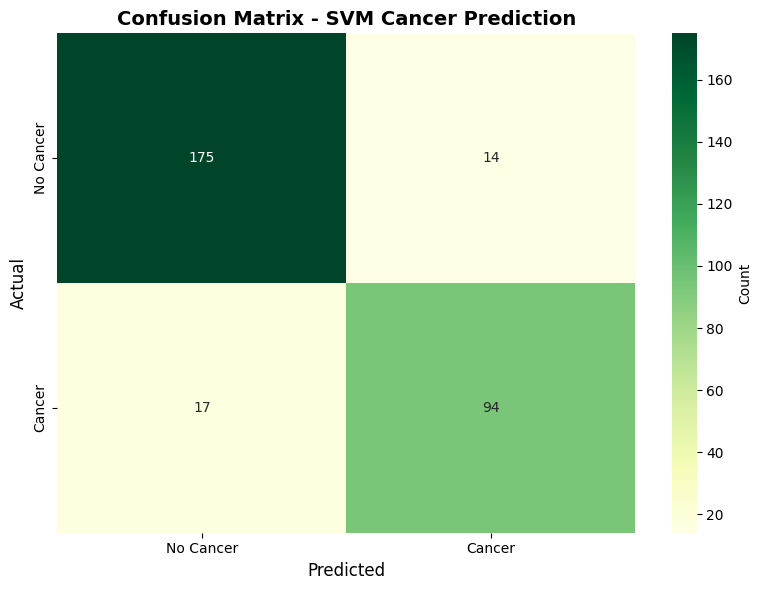

In [192]:
# Visualizations
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='YlGn', 
            xticklabels=["No Cancer", "Cancer"],
            yticklabels=["No Cancer", "Cancer"],
            cbar_kws={'label': 'Count'})
plt.xlabel("Predicted", fontsize=12)
plt.ylabel("Actual", fontsize=12)
plt.title("Confusion Matrix - SVM Cancer Prediction", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()